<a href="https://colab.research.google.com/github/mariaeduardagimenes/NLP/blob/master/An%C3%A1lise_Sentimento_API_Twitter_HomeOffice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Sentimento no Twitter sobre Home Office**

Esse projeto consiste na Análise de sentimentos de tweets coletados através da API do Twitter sobre X.

O projeto consiste em:

1. Coleta de Tweets
2. Identificação de tweets mais curtidos e retweetados
3. Identificação da fonte dos tweets
4. Análise de sentimentos
5. Nuvem de palavras mais frequentes
6. Séries de tweets no tempo
8. Mapa de calor dos tweets utilizando a localização declada pelos usuários



**As keywords coletadas foram:**
- home office
- trabalho remoto
- trabalho em casa
- homeoffice


**Utilizando o operador booleano OR**

keyword = ("'home office' OR 'trabalho remoto' OR 'trabalho em casa' OR homeoffice")

**Pacotes Pyhton utilizados**

1. Tweepy
Acessa API do Twitter

2. Textblob
Análise sentimento

3. Scrapy
Scrappings

4. NLTK
Biblioteca NLP 

**Importação de pacotes**

In [ ]:
#Pacotes básicos
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob as tb 
import time
import re

#Pacotes para visualização
import matplotlib.pyplot as plt

#MAPA
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from wordcloud import WordCloud, STOPWORDS






**TextBlob**

É usado para fazer análise de polaridade.

É pré-configurado na biblioteca para o idioma inglês para analisar se uma determinada frase em ingles, as palavras que a compoem são treinadas para falar se sao conotacao positiva ou negativa.

Não analisamos textos em português com ele.


**Folium**

Níveis de detalhamento.



In [ ]:
# Credenciais para utilização da API do Twitter 

API_key = ''
API_secret_key = ''
access_token = ''
access_token_secret = ''


**Autenticação na API do Twitter**

In [ ]:
auth = tweepy.OAuthHandler(API_key, API_secret_key)
auth.set_access_token(access_token, access_token_secret)

# Construir API instance
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,
                 retry_count=5,retry_delay=10)

onde:

- retry_count - número padrão de tentativas para tentar quando ocorrer um erro
- retry_delay - numero de segundos para aguardar entre tentativas
- wait_on_rate_limit - se deve ou nao esperar automaticamente a reposição dos limites de taxa
- wait_on_rate_limit_notify - imprima ou não uma notificação quando o Tweepy estiver aguardando a reposição dos limites de taxa

In [ ]:
# Postar um Twitter diretamente do Python

api.update_status("Este tweet vem direto do Python! <3 Usando as APIs do TT - \n #datascience #datadriven")

# O tweet vai aparecer no meu feed.

Status(_api=<tweepy.api.API object at 0x125740220>, _json={'created_at': 'Wed Aug 12 21:13:33 +0000 2020', 'id': 1293656896650579968, 'id_str': '1293656896650579968', 'text': 'Este tweet vem direto do Python! &lt;3 Usando as APIs do TT - \n #datascience #datadriven', 'truncated': False, 'entities': {'hashtags': [{'text': 'datascience', 'indices': [64, 76]}, {'text': 'datadriven', 'indices': [77, 88]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://www.igti.com.br/" rel="nofollow">Coleta IGTI Maria</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 29108807, 'id_str': '29108807', 'name': 'ninguém', 'screen_name': 'mariagimenes', 'location': 'Brazil', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 243, 'friends_count': 369, 'listed_count': 3, 'created_at': 'Mon A

**Coleta de dados (busca por palavra-chave)**

In [ ]:
# Definir listas de armazenamento
tweets = []
info = []

In [ ]:
#Definir que palavras (keyword) deseja pesquisar no Twitter

keyword = ("'home office' OR 'trabalho remoto' OR 'trabalho em casa' OR homeoffice")

Para realizar a busca por palavra chave vamos utilizar a função abaixo:

- API.search(q[,lang][,locale][,rpp][,page][,since_id][,geocode][,show_user])

**onde os principais parâmetros que serão usados são:**
- q : string de consulta de pesquisa
- lang : restringe os tweets para o idioma especificado, fornecido por um código iSO 6e 39-1.
    1) lang=pt -> português
    2) lang=en -> inglês
- rpp : o número de tweets a serem retornados por página, até no máximo 100
- page : o número da página (começando em 1) a ser retornado, até um máximo de aproximadamente 1500 resultados (com base na página rpp)
- since_id : retorna apenas status com um ID maior que (ou seja, mais recente que) o ID especificado
- geocode : retorna tweets de usuários localizados em um determinado
- show_user : quando verdadeiro, precede ":"no início do tweet. O padrao é falso

**Busca por palavra chave e recuperar os tweets em português**

In [ ]:
for tweet in tweepy.Cursor(api.search,
                           q=keyword, tweet_mode='extended', 
                           rpp=200, result_type="mixed",lang='pt', #serão solicitados apenas 200 tweets nesta aula
                           include_entities=True).items(200): 
        
    if 'retweeted_status' in dir(tweet): # checa se retweet
        # se status é retweet, status.full_text (tweet.full_text) could be truncated.
        # deveriamos pegar retweeted_status.full_text
        aux=tweet.retweeted_status.full_text       
    else: # se não é retweet
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet) #serão armazenados nos vetores vazios criados
    info.append(tweet)   
    file = open("tweets_Keyword_homeoffice_pt.txt", "a", -1, "utf-8")    
    file.write(newtweet+'\n')
    file.close()

**Para verificar a quantidade de tweets coletados, use a função "len()"**

In [ ]:
print("Total de tweets coletados %s." % (len(info)))

Total de tweets coletados 200.


**Criar data frame**

In [ ]:
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['USER']   = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])         
tweets_df['Place']    = np.array([tweet.place for tweet in info])

tweets_df.to_csv("tweets_Keyword_homeoffice_pt.csv")

In [ ]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,"5 meses depois, em uma quarentena rígida e mui...",236,1293731010618638339,quarentena_bot,Quarentena,Planeta Terra,None,2020-08-13 02:08:03,QuarentenaBot,0,1,None,None,None
1,"5 meses depois, em uma quarentena rígida e mui...",236,1293730988724350976,pedromaganem,Pedro Magalhães Ganem,,None,2020-08-13 02:07:58,Instagram,0,1,None,None,None
2,Home Office - Dicas para ser produtivo no trab...,84,1293730285830516736,empregobrasil,Emprego Brasil,Brasil,None,2020-08-13 02:05:11,EmpregoBrasil,0,0,None,None,None


**Identificar os Top Tweets coletados**

In [ ]:
# Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes']) #Função max do numpy identifica o valor máximo

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #pega o primeiro tweet com valor máximo de curtidas

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))

O tweet com mais curtidas (likes) é: 
PESQUISA [POA, REC, RIO, SAO, SSA]:  A. 45% trabalha/ou em casa na PANDEMIA  B. 68% acha/ou BOM  C. pra 49%, a produtividade não muda/ou  D. 58% quer manter o trabalho EM CASA depois disso tudo  E. 42% preferem home office em tempo parcial [56% integral]: https://t.co/LImw8sCObd. https://t.co/0CMdDFJj04
Número de curtidas: 47


In [ ]:
print(np.sum(tweets_df['Likes'] == likes_max)) #conta quantos tweets possuem o mesmo valor max

1


In [ ]:
retweet_max  = np.max(tweets_df['Retweets']) #retorna o valor máximo

retweet  = tweets_df[tweets_df.Retweets == retweet_max].index[0] #pega o primeiro tweet com valor máximo de Retweets

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

O tweet com mais retweet é: 
"o home office tirou algo terrivel que tbm nos fazia bem: o trânsito de volta pra casa. É ótimo não te-lo, óbvio. Mas é preciso encontrar o substituto pro papel que ele cumpria: o de descompressão pós trabalho, o ato de se desligar, de ouvir música, de pensar em outras coisas." https://t.co/zxe6oeF1yh
Número de retweets: 5487


**Identifica a fonte(origem) do tweet**

Nesse caso, app ou dispositivo onde o usuário postou o tweet

In [ ]:
sources = [] #lista para armazenar a fontes
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source) #inclui no vetor sources apenas se a fonte encontrada ainda não foi incluída

percent = np.zeros(len(sources)) #Retorna um novo vetor, com o número de elementos do vetor sources, preenchido com zeros a new array filled with zeros, for

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

**Gráfico que exibe o número de tweets por fonte**

In [ ]:
sourceDF = pd.DataFrame({
 'source':percent,
}, index=sources)

sourceDF

,source
QuarentenaBot,2.0
Instagram,6.0
EmpregoBrasil,5.0
Twitter for iPhone,46.0
Twitter for Android,73.0
Twitter Web App,60.0
Computadorbot,1.0
TweetDeck,3.0
What Concursos,2.0
Bonde DBI,1.0


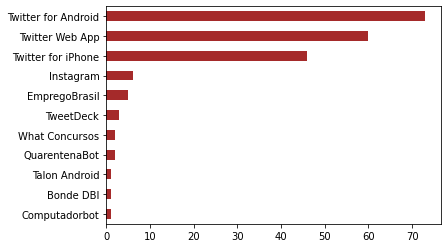

In [ ]:
sources_sorted = sourceDF.sort_values('source',ascending=True)
ax = sources_sorted.source.plot(kind='barh',color='#A52A2A')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

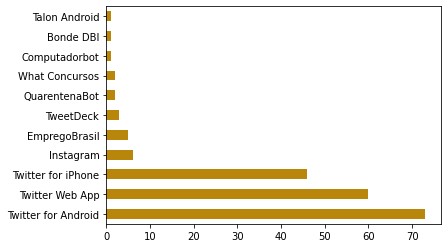

In [ ]:
sources_sorted = sourceDF.sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='#B8860B')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

Mais usuários usam Android.

**Análise de Polaridade**

In [ ]:
#Variável que irá armazenar as polaridades
analysis = None
# Lista vazia para armazenar as polaridades
polarities = []

In [ ]:
tweets_df.head()

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,"5 meses depois, em uma quarentena rígida e mui...",236,1293731010618638339,quarentena_bot,Quarentena,Planeta Terra,None,2020-08-13 02:08:03,QuarentenaBot,0,1,None,None,None
1,"5 meses depois, em uma quarentena rígida e mui...",236,1293730988724350976,pedromaganem,Pedro Magalhães Ganem,,None,2020-08-13 02:07:58,Instagram,0,1,None,None,None
2,Home Office - Dicas para ser produtivo no trab...,84,1293730285830516736,empregobrasil,Emprego Brasil,Brasil,None,2020-08-13 02:05:11,EmpregoBrasil,0,0,None,None,None
3,a coisa mais ESTRANHA do home office é que ter...,160,1293705463540985856,amywinehazi,haziel,"Florianópolis, Brazil",None,2020-08-13 00:26:33,Twitter for iPhone,14,0,None,None,None
4,@lwtnights Isso deveria ser desculpa? O trabal...,267,1293690840452411392,firexsevilla,ᴄʟᴀʀᴀ 🦋🇧🇷,"Manaus, Brasil",None,2020-08-12 23:28:26,Twitter for Android,0,0,None,None,None


**Polaridade para tweets em português**

In [ ]:
from googletrans import Translator
from unidecode import unidecode

**Um exemplo de tradução**



In [ ]:
tweets_df['Tweets'][3]

'a coisa mais ESTRANHA do home office é que termina o meu horário de trabalho e tipo. eu continuo aqui no “escritório” pq eu já trabalho em casa e no meu quarto.'

In [ ]:
textPT = unidecode(tweets_df['Tweets'][3])
textEN = Translator().translate(textPT)

In [ ]:
textEN.text

'the strangest thing about the home office is that it ends my work schedule and type. I\'m still here in the "office" because I already work at home and in my room.'

In [ ]:
analysis = tb(textEN.text)    
    #Calculando a polaridade do texto traduzido
polarity = analysis.sentiment.polarity #analisa a polaridade  
polarity

0.0

In [ ]:
for tweet in tweets_df['Tweets']: #para cada tweet lido foi passar por unicode
    #Texto do Tweet
    textPT = unidecode(tweet)
    
    #vou Traduzir para o Inglês
    textEN = Translator().translate(textPT)
    
    analysis = tb(textEN.text) #usar TextBlob    
    #Calculando a polaridade do texto traduzido
    polarity = analysis.sentiment.polarity #analisa a polaridade  
    polarities.append(polarity) #add polaridade de cada tweet no vetor polaridades

In [ ]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,"5 meses depois, em uma quarentena rígida e mui...",236,1293731010618638339,quarentena_bot,Quarentena,Planeta Terra,None,2020-08-13 02:08:03,QuarentenaBot,0,1,None,None,None
1,"5 meses depois, em uma quarentena rígida e mui...",236,1293730988724350976,pedromaganem,Pedro Magalhães Ganem,,None,2020-08-13 02:07:58,Instagram,0,1,None,None,None
2,Home Office - Dicas para ser produtivo no trab...,84,1293730285830516736,empregobrasil,Emprego Brasil,Brasil,None,2020-08-13 02:05:11,EmpregoBrasil,0,0,None,None,None


In [ ]:
print('Vetor de polaridade:',polarities)

Vetor de polaridade: [0.11161616161616161, 0.11161616161616161, 0.0, 0.0, -0.05, 0.47, 0.0625, -0.125, 0.25, 0.2681818181818182, -0.07, 0.0, 0.2333333333333333, 0.0, 0.03333333333333333, 0.225, 0.0, -0.022857142857142864, 0.3583333333333334, 0.0, -0.3, 0.6, 0.03333333333333333, 0.03333333333333333, 0.375, 0.0, 0.21875, 0.0, 0.0, -0.033333333333333326, -0.5666666666666668, 0.3516666666666666, 0.0, 0.0, 0.0, -0.5, 0.27499999999999997, 0.43333333333333335, 0.0, 0.0, 0.24999999999999997, -0.04642857142857142, 0.2, 0.0, 0.09166666666666667, 0.7, -0.012499999999999997, 0.10208333333333333, 1.0, -0.05, -0.25, 0.43333333333333335, 0.125, 0.009090909090909115, -0.1, 0.25, 0.15625, 0.15, 0.0625, 0.43333333333333335, 0.4000000000000001, 0.16666666666666666, 0.25, 0.009090909090909115, 0.15000000000000002, 0.009090909090909115, 0.43333333333333335, 0.0, -0.039999999999999994, 0.4166666666666667, 0.037500000000000006, 0.5666666666666667, 0.0, 0.10000000000000002, 0.0, 0.26666666666666666, -0.2, 0.0

**Análise de Sentimento**

In [ ]:
print('Para a(s) palavra(s):"%s"' % keyword)
print('A MÉDIA DE SENTIMENTO É: ' + str(np.mean(polarities)))

Para a(s) palavra(s):"'home office' OR 'trabalho remoto' OR 'trabalho em casa' OR homeoffice"
A MÉDIA DE SENTIMENTO É: 0.11164201839826837


In [ ]:
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive = positive+1
    elif polarity < 0:
        negative = negative+1
    else:
        neutral = neutral+1           

#calcula percentual
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

In [ ]:
sentiments = ['Positivos', 'Negativos','Neutros']
percents = [pos_pct, neg_pct, neu_pct]

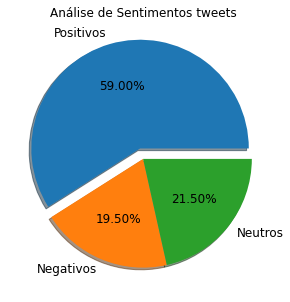

In [ ]:
explode = (0.1, 0, 0) #Separa o primeiro

pie_chart = pd.Series(percents, index=sentiments,name='')
pie_chart.plot.pie(fontsize=12, explode=explode, autopct='%.2f%%', shadow=True,
                   figsize=(5, 5),title="Análise de Sentimentos tweets");

In [ ]:
tweets_df

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,"5 meses depois, em uma quarentena rígida e mui...",236,1293731010618638339,quarentena_bot,Quarentena,Planeta Terra,None,2020-08-13 02:08:03,QuarentenaBot,0,1,None,None,None
1,"5 meses depois, em uma quarentena rígida e mui...",236,1293730988724350976,pedromaganem,Pedro Magalhães Ganem,,None,2020-08-13 02:07:58,Instagram,0,1,None,None,None
2,Home Office - Dicas para ser produtivo no trab...,84,1293730285830516736,empregobrasil,Emprego Brasil,Brasil,None,2020-08-13 02:05:11,EmpregoBrasil,0,0,None,None,None
3,a coisa mais ESTRANHA do home office é que ter...,160,1293705463540985856,amywinehazi,haziel,"Florianópolis, Brazil",None,2020-08-13 00:26:33,Twitter for iPhone,14,0,None,None,None
4,@lwtnights Isso deveria ser desculpa? O trabal...,267,1293690840452411392,firexsevilla,ᴄʟᴀʀᴀ 🦋🇧🇷,"Manaus, Brasil",None,2020-08-12 23:28:26,Twitter for Android,0,0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"""o home office tirou algo terrivel que tbm nos...",302,1291225185975242753,BlueTrouble02,Trouble_blue,Brasil,None,2020-08-06 04:10:48,Twitter for Android,0,5487,None,None,None
196,O home office tirou algo terrivel que tbm nos ...,276,1291222063756316672,alainpetterson,Faixa branca da vida,"Santiago, Chile",None,2020-08-06 03:58:24,Twitter for Android,0,1424,None,None,None
197,No home office a gente trabalha em casa ou a g...,69,1291216118867283970,brsneuro,Prof. Bruno Rezende de Souza,"Belo Horizonte, Brasil",None,2020-08-06 03:34:47,Twitter for Android,22,4,None,None,None
198,O home office tirou algo terrivel que tbm nos ...,300,1291206345035784192,LauraPassarella,Laura,"Santo André, Brasil",None,2020-08-06 02:55:56,Twitter for Android,0,113,None,None,None


**Mapa de calor dos tweets**

In [ ]:
#MAPA
from geopy.geocoders import Nominatim
import folium
from folium import plugins

In [ ]:
geolocator = Nominatim(user_agent="TweetsSentiments")

latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [ ]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(zoom_start=3.)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('Mapa_Calor_homeoffice_pt.html')
mapa

**WordCloud**

In [ ]:
from wordcloud import WordCloud

In [ ]:
words = ' '.join(tweets_df['Tweets']) #transformando pra string

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])

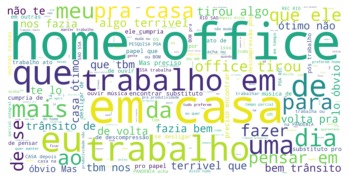

In [ ]:
import warnings

warnings.simplefilter('ignore')

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('homeoffice_cloud_pt.png', dpi=300)
plt.show()

**Análise Temporal dos tweets**

In [ ]:
#tweets postados por dia
data = tweets_df

In [ ]:
print(data['Date'][0])

2020-08-13 02:08:03


In [ ]:
from datetime import datetime

In [ ]:
#tweets postados por dia

data = tweets_df

print(data['Date'][0])

data['Date'] = pd.to_datetime(data['Date']).apply(lambda x: x.date())

print(data['Date'][0])

2020-08-13 02:08:03
2020-08-13


In [ ]:
x = data['Date'].value_counts() #conta q qtd de tweets por dia

x

2020-08-07    39
2020-08-10    39
2020-08-06    34
2020-08-11    32
2020-08-12    23
2020-08-08    15
2020-08-09    14
2020-08-13     4
Name: Date, dtype: int64

In [ ]:
tlen = pd.Series(data['Date'].value_counts(), index=data['Date'])

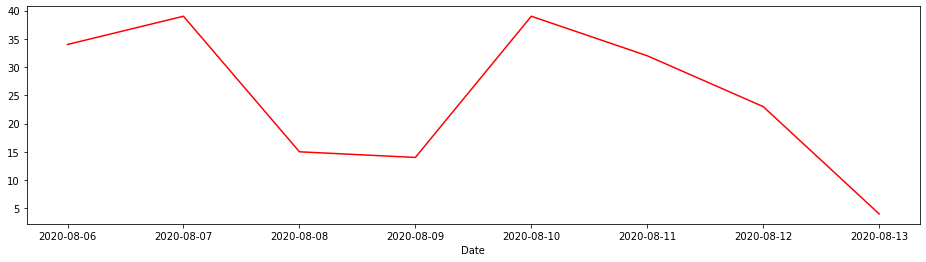

In [ ]:
tlen.plot(figsize=(16,4), color='r')